In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest

In [4]:
nlp = spacy.load("en_core_web_sm")

In [58]:
sentence = "With government when you look at what's happening with the Trump White House the Obama White House the bush White House, you could see this trend happening when you look what's happening with Facebook when you look at what's happening with Google when you look the fact that you go to every restaurant today and you see people looking at phones, you know, you get on a bus you get on a subway, you know, you see somebody sitting next to you in traffic."
sentence = sentence.replace(',', '.')

In [118]:
import requests
import urllib.parse
with open('../quint/data/sample_texts/goog_joe_rogan_tr.txt') as f:
    doc = f.readlines()
doc = doc[0].replace("?", ".")[:5000]
#text = "Okay. You're very professional. People are like, how do you live? And things like that. They're taking money from the russians. And of course the answer is no, but I do this for a living, like I speak. I don't have a YouTube channel where I'm joe rogan, but I give speeches at universities and things like that. I do a lot of interviews. We're recording now, right. My own setup. Is it possible that you could do a YouTube channel? Would that work? Yeah, if you introduce me so I get followers. Yeah, we could do that, dude, I'm all in. That could absolutely happen. Do you want to do that? Is that something you want to do? No. I mean, this is a big question. So I came on because I had just written a book called permanent record, which is the story of my life, because that's what publishers make you do when you're writing your first book. But it's more than that, because I didn't just want to talk about me. It's actually about the changing of technology and the changing of government in this sort of post 911 era, which our generation just sort of happened to be growing up during. And I was at the CIA and the NSA and all this stuff, but the day that the book came out, the government hit me with a lawsuit, and they hit the publisher of the books with a lawsuit because they don't want to see books like this get written. They especially don't want to see books like this get read. And so the big thing was, we didn't know where this is going. We didn't know what was going to happen. And my publisher, of course, wanted me very badly to let people know this book existed in case the government leaned harder and harder and harder. We didn't know where that's going. The government is still pursuing that case quite strongly. They're more focused on the financial censorship side of it, basically taking any money that I made from it kind of as a warning to the others and getting a legal judgment against the publishers saying, you can't pay this guy, that kind of thing more so than taking the book off the shelves. But that's not because they're okay with the book being on the shelves. It's because, thankfully we've got the first amendment, and so they can't and that's a very rare and good thing. But anyway, in the context of that, they were like, well, what about Joe rogan? And I had heard about you at this point, but the only thing that I had really seen, that I really understood, had familiarity with, was, like, you talking to bernie sanders, which, by the way, I very much appreciated hearing that, because a lot of people don't give the guy time to talk. Yeah. To hear him in those sound bites, you don't really get an understanding of who he actually is. Right. And this is the other thing. They're like, well, you can go on all these major network shows, and I did a couple of them. I did, like, a morning show. I did Brian Williams. But broadly, the media, the sort of more corporatized media, as we might say, is exactly what you just described, right? They want you to be able to answer in like, 815 seconds or less. And when we're talking about big, massive shifts in society, when we're talking about power, when we're talking about technology and how it controls and influences us in the future, you can't have a meaningful conversation within those constraints. And so instead, these guys all want to say, repeat these long discredited sort of criticisms. And, you know, I'm sure you'll ask the same thing, and that's okay. They're fur questions, but it's like, we can't have the conversation if we can't have the space to think and breathe and have this sort of discussion. So anyway, they mentioned you. And I was like, Joe Rogan. Joe Rogan. Joe Rogan. Where do I know this name from? Before bernie Sanders. And I looked back through my Twitter mentions, and the funny thing is, your fans have been harassing me to death for the last years. Wonderful people, wonderful people. But like go on. Jill Rogen Go on, Jill Rogen. And I remember after I had just made a Twitter account, neil degrasse Tyson actually helped me get on Twitter, gave me that little initial boost, and they said, Joe Rogan, they linked you. And I mouse over your name because I use a desktop, not mobile for this because security reasons. And it pops up and I get your avatar, man. And I have to say, your logo is the worst thing in the world for people who are trying to be politically serious. And they're worried about the national security advisory condemning because, like, this bald guy with this maniacal grin and like, the third eye on his forehead. And I'm like, oh, man, that show, that doesn't look good. But it's actually like when you watch what you're doing, it's great stuff, man. It's great. But that first impression, like, this almost didn't happen. But everybody who has talked to you, everybody who watches your show, I think they get a very different impression than how you're paying it. And for me, it's a wonderful thing because nobody understands that better than I do, right? Like, the government ran a smear campaign against me endlessly for six months when I came forward in June of 2013. I know we got way off topic here. I'll get back to it. Fine. "

safe_string = urllib.parse.quote_plus(doc)
api_url = 'https://api.plnia.com/v1/summary'
api_key = '7Xnwqhy5xY4Eoc33sRcI2Pgvox'
params = {'apikey':api_key,'text':safe_string}

response = requests.get(api_url,params=params)

In [119]:
response.json()

{'status': 'error', 'message': ''}

In [ ]:
requests.get(url, header)

In [67]:
with open('../quint/data/sample_texts/goog_joe_rogan_tr.txt') as f:
    doc = f.readlines()
    
doc = ' '.join(doc)
doc = doc.replace(',', '.')

In [68]:
doc = nlp(doc)
#doc = nlp(sentence)

In [69]:
keyword = []

stopwords = list(STOP_WORDS)
pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']

for token in doc:
    if(token.text in stopwords or token.text in punctuation):
        continue
    if(token.pos_ in pos_tag):
        keyword.append(token.text)

freq_word = Counter(keyword)
freq_word.most_common(5)


[('know', 269),
 ('people', 147),
 ('government', 136),
 ('right', 105),
 ('think', 88)]

In [70]:
max_freq = Counter(keyword).most_common(1)[0][1]
for word in freq_word.keys():
    freq_word[word] = (freq_word[word]/max_freq)
freq_word.most_common(5)

[('know', 1.0),
 ('people', 0.5464684014869888),
 ('government', 0.5055762081784386),
 ('right', 0.3903345724907063),
 ('think', 0.3271375464684015)]

In [76]:
from unittest.mock import sentinel


sent_strength ={}
for sent in doc.sents:
    for word in sent:
        if word.text in freq_word.keys():
            if sent in sent_strength.keys():
                sent_strength[sent]+=freq_word[word.text]
            else:
                sent_strength[sent] = freq_word[word.text]
summarized_sentences = nlargest(10,sent_strength, key=sent_strength.get)
print(summarized_sentences)

[the distance between speculation and fact the distance between what you know and what you can prove to everybody else in the country is everything in our model of government because what you know doesn't matter What matters is what we all know and the only way we can all know it is if somebody can prove it if you can prove it and if you don't have the evidence., We didn't know it was going to happen and my publisher of course wanted me very badly to let people know this book existed in case the government leaned hard and harder and harder., So you're gonna be bound to this cell phone tower and that cell phone tower is gonna make a note a permanent record saying this phone this phone handset with this phone number at this time was connected to me right and based on your phone handset and your phone number they can get your identity., That means we know their decisions that means we know their policies that means we know their programs and prerogatives and powers like what they are doin

In [72]:
summarized_sentences

[the distance between speculation and fact the distance between what you know and what you can prove to everybody else in the country is everything in our model of government because what you know doesn't matter What matters is what we all know and the only way we can all know it is if somebody can prove it if you can prove it and if you don't have the evidence.]

In [73]:
import pandas as pd
df = pd.DataFrame(sent_strength, index=[0]).T.reset_index().sort_values(0, ascending=False)
df['len'] = df['index'].apply(len)
df.columns = ['text', 'importance', 'len']

In [74]:
df.head(20)['text']

1553    (the, distance, between, speculation, and, fac...
30      (We, did, n't, know, it, was, going, to, happe...
2051    (So, you, 're, gon, na, be, bound, to, this, c...
1237    (That, means, we, know, their, decisions, that...
1420    (you, have, no, right, to, discover, evidence,...
1494    (will, you, have, this, information, and, you,...
189     (but, I, do, believe, that, everybody, in, the...
139     (which, they, said, was, supposed, to, monitor...
205     (Most, of, them, did, n't, even, know, right, ...
1512    (When, I, saw, people, like, Ron, White, on, t...
299     (right, all, these, little, Suburban, communit...
109     (The, government, is, only, supposed, to, be, ...
1534    (And, the, thing, is, you, can, know, about, s...
513     (you, know, terrorists, we, created, shows, li...
1901    (to, criticize, the, Russian, government, 's, ...
1673    (They, do, n't, know, who, these, people, are,...
1025    (most, people, have, all, of, these, controls,...
76      (and, 

<AxesSubplot:xlabel='importance', ylabel='len'>

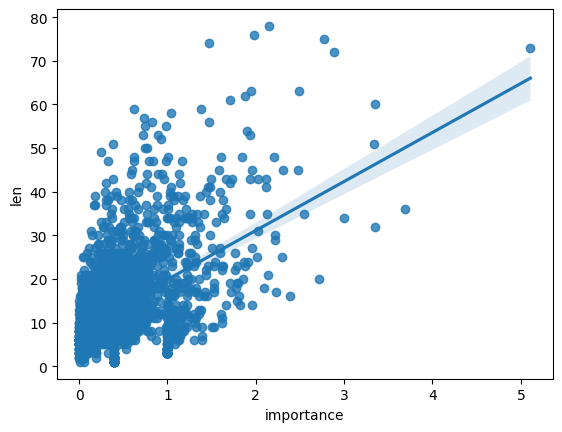

In [75]:
import seaborn as sns

sns.regplot(data=df, x='importance',y='len')